In [31]:
###Import the usual libraries 
import numpy as np

import astropy
from astropy.io import fits, ascii
from astropy.table import Table, Column, vstack, hstack

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 32}) #make plots more readable

#Annoyance mitigation
import warnings
warnings.filterwarnings('ignore')


#Get rid of bad pixels
def badpixel(spec_array):
    for i in range(len(spec_array)):
        if spec_array[i] <= 0.01:
            spec_array[i] = 1.0
        if spec_array[i] >= 1.1:
            spec_array[i] = 1.0
    return spec_array

In [10]:
###Import Data ###

### headers ###

'''
wavfirst = 10**([1].header[crval1] + [1].header[cdelt1] * 
(np.arange([1].header[naxis1]) + 1 - [1].header[crpix1]))
''' 
firsth1 = fits.open(
    '/Users/joshpovick/desktop/research/LMCmetalpoor/Re__stars/aspcapStar-r13-2M08074936+1727527.fits')[1]
wavfirst1 = 10**(firsth1.header['CRVAL1']+firsth1.header['CDELT1']*(np.arange(firsth1.header['NAXIS1']) 
                                                                 + 1 - firsth1.header['CRPIX1']))

secondh1 = fits.open(
    '/Users/joshpovick/desktop/research/LMCmetalpoor/Re__stars/aspcapStar-r13-2M10121505+0250334.fits')[1]
wavsecond1 = 10**(secondh1.header['CRVAL1']+secondh1.header['CDELT1']*(np.arange(secondh1.header['NAXIS1']) 
                                                                 + 1 - secondh1.header['CRPIX1']))

thirdh1 = fits.open(
    '/Users/joshpovick/desktop/research/LMCmetalpoor/Re__stars/aspcapStar-r13-2M13280310-0258119.fits')[1]
wavthird1 = 10**(thirdh1.header['CRVAL1']+thirdh1.header['CDELT1']*(np.arange(thirdh1.header['NAXIS1']) 
                                                                 + 1 - thirdh1.header['CRPIX1']))
### Spectra ###

first1_1 = fits.getdata(
    '/Users/joshpovick/desktop/research/LMCmetalpoor/stars/aspcapStar-r13-2M00554954+0335166.fits',1) 
first1_3 = fits.getdata(
    '/Users/joshpovick/desktop/research/LMCmetalpoor/stars/aspcapStar-r13-2M00554954+0335166.fits',3)

second1_1 = fits.getdata(
    '/Users/joshpovick/desktop/research/LMCmetalpoor/stars/aspcapStar-r13-2M13273289-4727599.fits',1)
second1_3 = fits.getdata(
    '/Users/joshpovick/desktop/research/LMCmetalpoor/stars/aspcapStar-r13-2M13273289-4727599.fits',3)

third1_1 = fits.getdata(
    '/Users/joshpovick/desktop/research/LMCmetalpoor/stars/aspcapStar-r13-2M16092830-3819303.fits',1)
third1_3 = fits.getdata(
    '/Users/joshpovick/desktop/research/LMCmetalpoor/stars/aspcapStar-r13-2M16092830-3819303.fits',3)

values1 = fits.getdata(
    '/Users/joshpovick/desktop/research/LMCmetalpoor/Re__stars/apgdr16_alphaspread_stars_v2.fits',1)

In [57]:
##################
### Parameters ###
##################

star10 = np.where(values1['APOGEE_ID']=='2M08074936+1727527')
star11 = np.where(values1['APOGEE_ID']=='2M10121505+0250334')
star12 = np.where(values1['APOGEE_ID']=='2M13280310-0258119')
stars1 = np.squeeze([star10,star11,star12])

temps = []
loggs = []
metas = []
MH = []
alphs = []
snr = []
silicon = [] 
magnesium = []

for i in stars1:
    temps.append(values1['TEFF'][i])
    loggs.append(values1['LOGG'][i])
    metas.append(values1['FE_H'][i])
    alphs.append(values1['ALPHA_M'][i])
    snr.append(values1['SNR'][i])
    silicon.append(values1['SI_FE'][i])
    magnesium.append(values1['MG_FE'][i])
    MH.append(values1['M_H'])
print(magnesium)

[0.33890176, 0.21990168, 0.016890645]


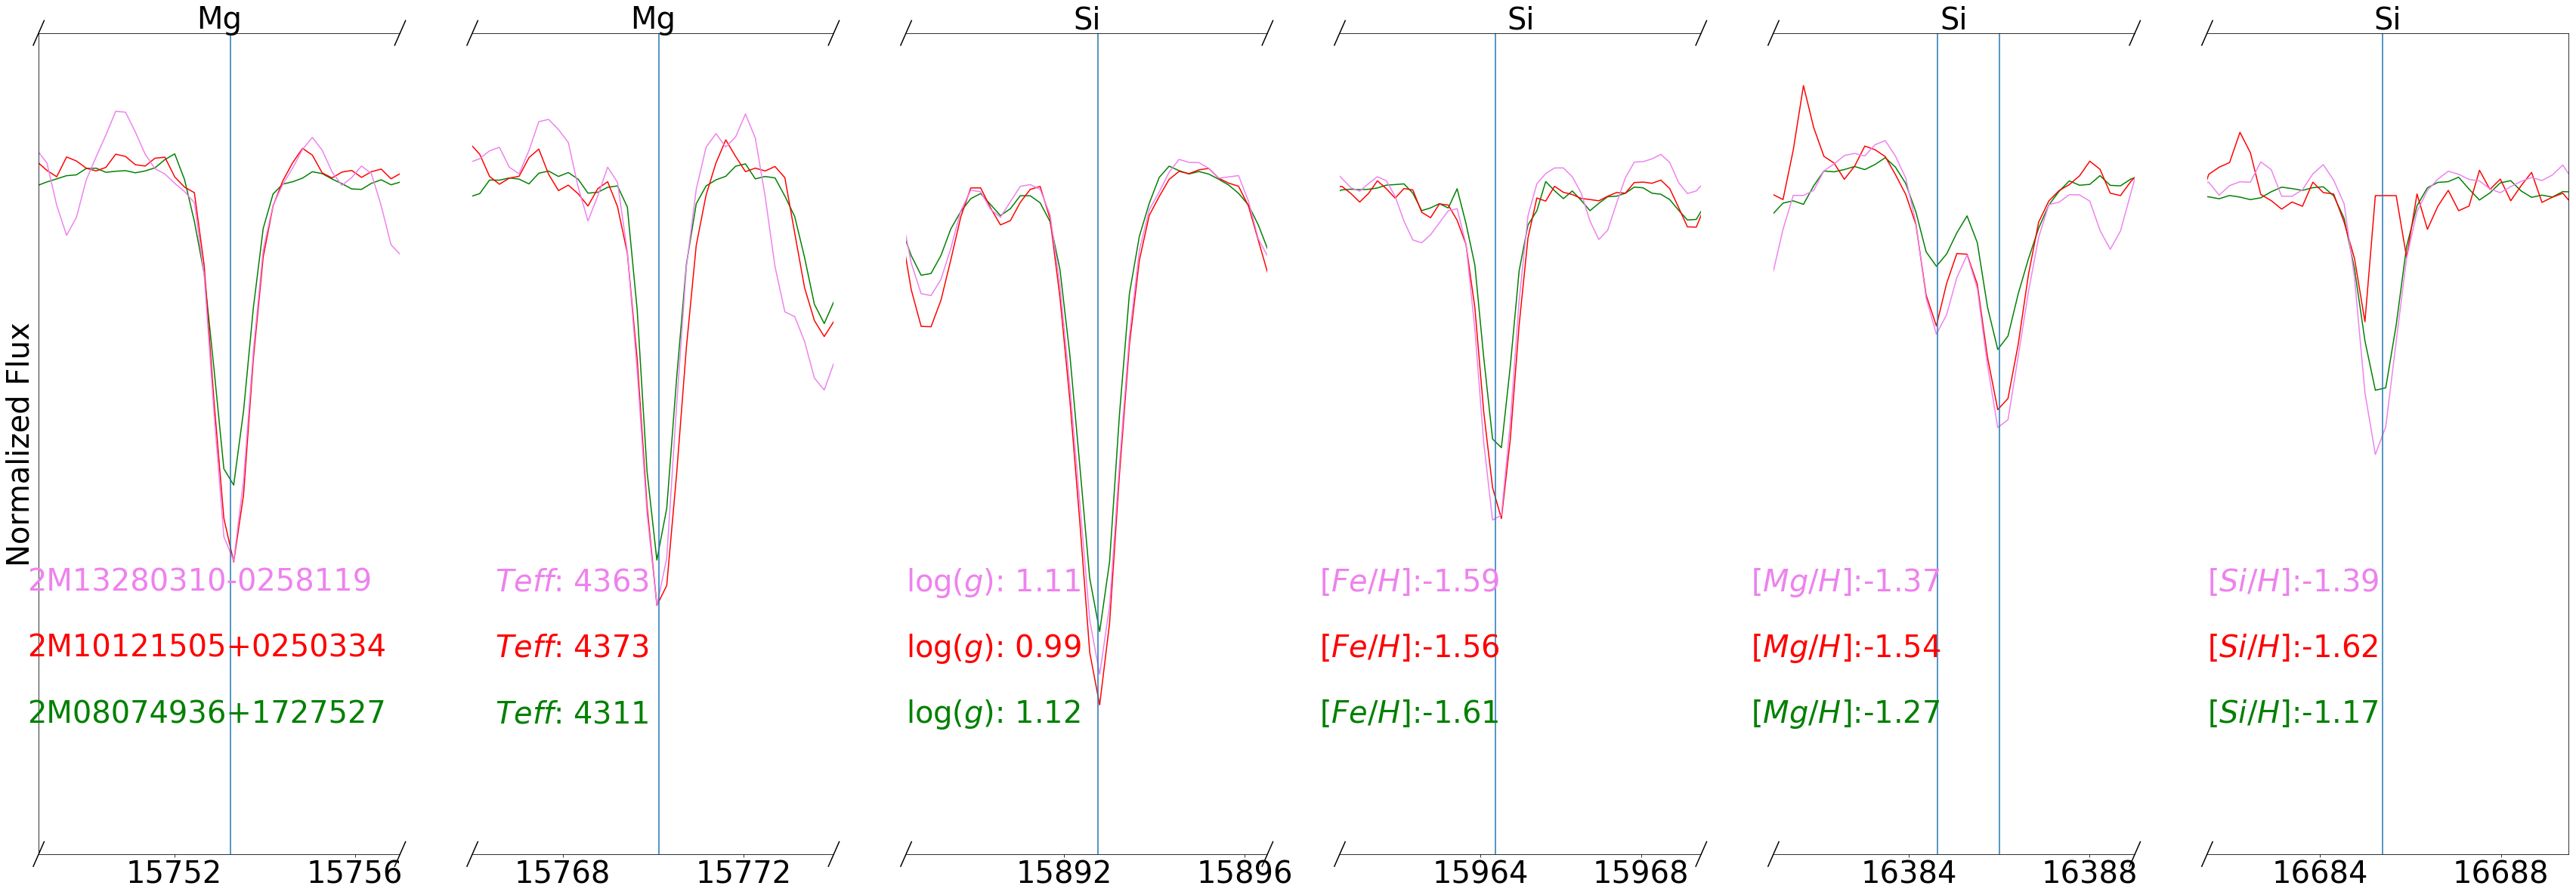

In [67]:
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

specs1 = [badpixel(first1_1),badpixel(second1_1),badpixel(third1_1)]
waves1 = [wavfirst1,wavsecond1,wavthird1]


matplotlib.rcParams.update({'font.size': 32})
tick_spacing = 4
d = 0.015

mult = 0.05

colors = ['green','violet','red','saddlebrown']

f,(allx3,allx4,allx5,allx6,allx7,allx8) = plt.subplots(1,6,sharey=True, facecolor='w',figsize=(60,20))

count = 0
for i1 in stars1: 
    allx3.plot(waves1[i1], specs1[i1],c=colors[i1])
    allx4.plot(waves1[i1], specs1[i1],c=colors[i1])
    allx5.plot(waves1[i1], specs1[i1],c=colors[i1])
    allx6.plot(waves1[i1], specs1[i1],c=colors[i1])
    allx7.plot(waves1[i1], specs1[i1],c=colors[i1])
    allx8.plot(waves1[i1], specs1[i1],c=colors[i1])
    
    #text#
    allx3.text(15748.75,(1-0.4)+(count*mult),'{}'.format(values1['APOGEE_ID'][i1]),
               fontsize=40,color=colors[i1])
    allx4.text(15766.5,(1-0.4)+(count*mult),r'$Teff$:{:5.0f}'.format(temps[i1]),
               fontsize=40,color=colors[i1])
    allx5.text(15888.5,(1-0.4)+(count*mult),'$\log(g)$:{:5.2f}'.format(loggs[i1]),
               fontsize=40,color=colors[i1])
    allx6.text(15960,(1-0.4)+(count*mult),'$[Fe/H]$:{:5.2f}'.format(metas[i1]),
               fontsize=40,color=colors[i1])
    allx7.text(16380.5,(1-0.4)+(count*mult),'$[Mg/H]$:{:5.2f}'.format(magnesium[i1]+metas[i1]),
               fontsize=40,color=colors[i1])
    allx8.text(16681.5,(1-0.4)+(count*mult),'$[Si/H]$:{:5.2f}'.format(silicon[i1]+metas[i1]),
               fontsize=40,color=colors[i1])
    
    count += 1

#limits for each subplot
allx3.set_xlim(15749,15757) #(15746,15760)
allx4.set_xlim(15766,15774) #(15763,15777)
allx5.set_xlim(15888.5,15896.5) #(15885.5,15899.5)
allx6.set_xlim(15960.5,15969.5) #(15957.5,15971.5)
allx7.set_xlim(16381,16389) #(16378,16392)
allx8.set_xlim(16681.5,16689.5) #(16678.5,16692.5)

#Set Spines
allx3.spines['left'].set_visible(True)
allx3.spines['right'].set_visible(False)
allx4.spines['left'].set_visible(False)
allx4.spines['right'].set_visible(False)
allx5.spines['left'].set_visible(False)
allx5.spines['right'].set_visible(False)
allx6.spines['left'].set_visible(False)
allx6.spines['right'].set_visible(False)
allx7.spines['left'].set_visible(False)
allx7.spines['right'].set_visible(False)
allx8.spines['left'].set_visible(False)

#Set ticks
allx3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
allx3.xaxis.set_tick_params(labelsize=40)
allx4.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
allx4.xaxis.set_tick_params(labelsize=40)
allx5.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
allx5.xaxis.set_tick_params(labelsize=40)
allx6.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
allx6.xaxis.set_tick_params(labelsize=40)
allx7.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
allx7.xaxis.set_tick_params(labelsize=40)
allx8.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
allx8.xaxis.set_tick_params(labelsize=40)

allx3.yaxis.tick_left()
allx3.tick_params(labelright='off')
allx3.set_yticks([])
allx4.set_yticks([])
allx5.set_yticks([])
allx6.set_yticks([])
allx7.set_yticks([])
allx8.yaxis.tick_left()
allx6.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
allx6.tick_params(labelsize=40)

allx3.ticklabel_format(useOffset=False)
allx4.ticklabel_format(useOffset=False)
allx5.ticklabel_format(useOffset=False)
allx6.ticklabel_format(useOffset=False)
allx7.ticklabel_format(useOffset=False)
allx8.ticklabel_format(useOffset=False)

allx3.set_ylabel('Normalized Flux' ,fontsize=40)

#vertical lines at center of features
allx3.axvline(x=15753.25)
allx4.axvline(x=15770.125)
allx5.axvline(x=15892.75)
allx6.axvline(x=15964.375)
allx7.axvline(x=16384.625)
allx7.axvline(x=16386)
allx8.axvline(x=16685.375)

#set titles
allx3.set_title('Mg',fontsize=40)
allx4.set_title('Mg',fontsize=40)
allx5.set_title('Si',fontsize=40)
allx6.set_title('Si',fontsize=40)
allx7.set_title('Si',fontsize=40)
allx8.set_title('Si',fontsize=40)



#create angled lines for broken axes
kwargs = dict(transform=allx3.transAxes, color='k', clip_on=False)    
allx3.plot((-d,+d), (1-d,1+d), **kwargs)
allx3.plot((-d,+d), (-d,+d), **kwargs)
kwargs = dict(transform=allx3.transAxes, color='k', clip_on=False)
allx3.plot((1-d,1+d), (-d,+d), **kwargs)
allx3.plot((1-d,1+d),(1-d,1+d), **kwargs)
kwargs.update(transform=allx4.transAxes)  
allx4.plot((-d,+d), (1-d,1+d), **kwargs)
allx4.plot((-d,+d), (-d,+d), **kwargs)
kwargs = dict(transform=allx4.transAxes, color='k', clip_on=False)
allx4.plot((1-d,1+d), (-d,+d), **kwargs)
allx4.plot((1-d,1+d),(1-d,1+d), **kwargs)
kwargs.update(transform=allx5.transAxes)  
allx5.plot((-d,+d), (1-d,1+d), **kwargs)
allx5.plot((-d,+d), (-d,+d), **kwargs)
kwargs = dict(transform=allx5.transAxes, color='k', clip_on=False)
allx5.plot((1-d,1+d), (-d,+d), **kwargs)
allx5.plot((1-d,1+d),(1-d,1+d), **kwargs)
kwargs.update(transform=allx6.transAxes)  
allx6.plot((-d,+d), (1-d,1+d), **kwargs)
allx6.plot((-d,+d), (-d,+d), **kwargs)
kwargs = dict(transform=allx6.transAxes, color='k', clip_on=False)
allx6.plot((1-d,1+d), (-d,+d), **kwargs)
allx6.plot((1-d,1+d),(1-d,1+d), **kwargs)
kwargs.update(transform=allx7.transAxes)  
allx7.plot((-d,+d), (1-d,1+d), **kwargs)
allx7.plot((-d,+d), (-d,+d), **kwargs)
kwargs = dict(transform=allx7.transAxes, color='k', clip_on=False)
allx7.plot((1-d,1+d), (-d,+d), **kwargs)
allx7.plot((1-d,1+d),(1-d,1+d), **kwargs)
kwargs.update(transform=allx8.transAxes)  
allx8.plot((-d,+d), (1-d,1+d), **kwargs)
allx8.plot((-d,+d), (-d,+d), **kwargs)

#ylim
plt.gca().set_ylim(bottom=0.5)

plt.savefig('overtop_features.pdf', orientation='landscape')

plt.show()